In [1]:
import sys
sys.path.append('..')
%matplotlib inline

import numpy as np
from sklearn.metrics import matthews_corrcoef
from korr import mcc, flatten, corr_vs_pval, corrgram

## Actual vs Prediction

### Test 1 - Small Data
* sklearn's `matthews_corrcoef` returns a metric for one pair of variables
* korr's `mcc` has more overhead as it returns a matrix for potentially `n*(n-1)/2` correlation pairs

In [2]:
np.random.seed(43)
y_true = (np.random.normal(size=(100,2)) > 0).astype(int)
y_pred = y_true[:, 0]
y_true = y_true[:, 1]

In [3]:
%%time
r = matthews_corrcoef(y_true, y_pred)  # sklearn
print(r)

-0.05925926994729419
CPU times: user 5.08 ms, sys: 4.14 ms, total: 9.22 ms
Wall time: 12.6 ms


In [4]:
%%time
r, _ = mcc(np.c_[y_true, y_pred])
print(r)

[[ 1.         -0.05925927]
 [-0.05925927  1.        ]]
CPU times: user 2.44 ms, sys: 1.62 ms, total: 4.06 ms
Wall time: 7.09 ms


### Test 2 - Medium Size Data
This looks similar to sklearn's `confusion_matrix` vs `korr.confusion`, i.e. sklearn's `confusion_matrix` seems to slow down `matthews_corrcoef` as well.

In [5]:
np.random.seed(43)
y_true = (np.random.normal(size=(50000,2)) > 0).astype(int)
y_pred = y_true[:, 0]
y_true = y_true[:, 1]

In [6]:
%%time
r = matthews_corrcoef(y_true, y_pred)  # sklearn
print(r)

-0.00963619535336387
CPU times: user 87.6 ms, sys: 6.14 ms, total: 93.7 ms
Wall time: 111 ms


In [7]:
%%time
r, _ = mcc(np.c_[y_true, y_pred])
print(r)

[[ 1.        -0.0096362]
 [-0.0096362  1.       ]]
CPU times: user 6.68 ms, sys: 3.71 ms, total: 10.4 ms
Wall time: 8.35 ms


### Test 3 - Millions of Obs

In [8]:
np.random.seed(43)
y_true = (np.random.normal(size=(10000000,2)) > 0).astype(int)
y_pred = y_true[:, 0]
y_true = y_true[:, 1]

In [9]:
%%time
r = matthews_corrcoef(y_true, y_pred)  # sklearn
print(r)

0.0003776687195407562
CPU times: user 15.3 s, sys: 1.09 s, total: 16.4 s
Wall time: 16.6 s


In [10]:
%%time
r, _ = mcc(np.c_[y_true, y_pred])
print(r)

[[1.0000000e+00 3.7766872e-04]
 [3.7766872e-04 1.0000000e+00]]
CPU times: user 554 ms, sys: 142 ms, total: 696 ms
Wall time: 954 ms


## Correlation Analysis (EDA)

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import minmax_scale
X = (minmax_scale(load_breast_cancer().data, axis=0) > 0.5).astype(int)

Compute Matthews correlation for all variable pairs

In [12]:
r, pval = mcc(X)

The highest absolute Matthew correlations

In [13]:
flatten(r, pval, sortby="cor").head(10)

,i,j,cor,pval
282,12,13,1.000000,0.0
1,0,2,0.976025,0.0
391,20,22,0.908899,0.0
74,2,20,0.834104,0.0
247,10,13,0.815776,0.0
246,10,12,0.815776,0.0
19,0,20,0.813346,0.0
76,2,22,0.771654,0.0
21,0,22,0.752464,0.0
103,3,23,0.708857,0.0


There are few negative correlations that are insignificant and have values around zero.

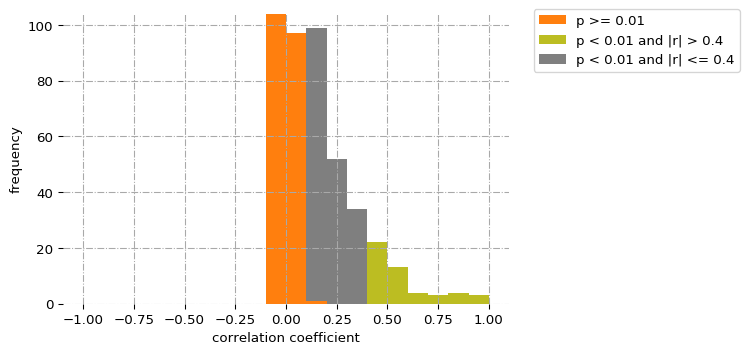

In [14]:
corr_vs_pval(r, pval);

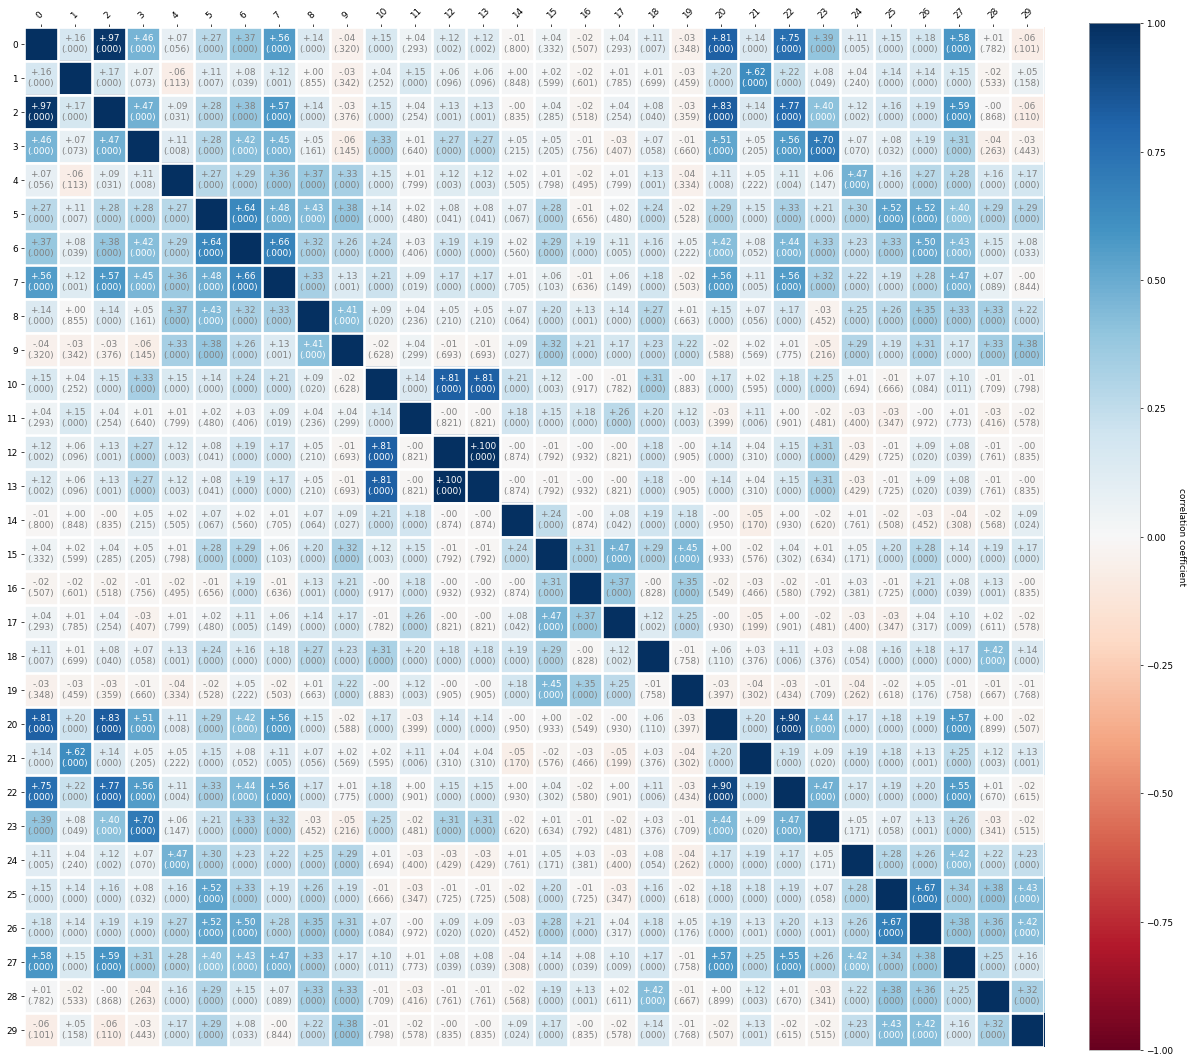

In [15]:
corrgram(r, pval, dpi=64);